# Ejemplo de aplicación de Random Forest.
Para aplicarlo se va a usar el dataset mnist con una clasificación multiclase.

In [1]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestClassifier
randomF_clf = make_pipeline(StandardScaler(),RandomForestClassifier(criterion = "entropy", n_estimators=500, max_leaf_nodes=64, random_state=42))
#criterion{“gini”, “entropy”, “log_loss”}, default=”gini”
#n_estimators: (default=100). Número de árboles en el bosque.
#max_depth: por defecto ninguno (en cuyo caso se extiende hasta que todas sean puras o 
            #no se supere el mínimo número de muestras para dividir)
#max_features: {“sqrt”, “log2”, None}, int or float, default=”sqrt”
            #El número de características a considerar al buscar la mejor división:
            #If int, then consider max_features features at each split.
            #If float, then max_features is a fraction and max(1, int(max_features * n_features_in_)) features are considered at each split.
            # If “auto”, then max_features=sqrt(n_features).
            # If “sqrt”, then max_features=sqrt(n_features).
            #If “log2”, then max_features=log2(n_features).
            #If None, then max_features=n_features.
#max_leaf_nodes: int, default=None. Máximo número de ndos hoja. Si se omite el número es ilimitado.

In [2]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1, as_frame=False)
X, y = mnist["data"], mnist["target"]

/home/angel/ml/env/lib/python3.8/site-packages/sklearn/datasets/_openml.py:1002: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [3]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [4]:
randomF_clf.fit(X_train, y_train)
y_pred_rf = randomF_clf.predict(X_test)

In [5]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred_rf)
cm

array([[1268,    1,    2,    1,    1,    3,   11,    0,   28,    0],
       [   0, 1576,    7,    2,    3,    7,    3,    6,   13,    1],
       [  17,    9, 1229,   18,   19,   10,   40,   30,   18,   10],
       [   9,   13,   44, 1249,    3,   28,   11,   26,   39,   17],
       [   6,    2,    3,    0, 1188,    3,   35,    8,   16,  102],
       [  32,   25,    3,   86,   13, 1039,   32,    6,   22,   20],
       [  19,    6,   18,    0,   11,   13, 1268,    0,    9,    0],
       [   3,   23,   34,    0,   17,    1,    0, 1365,   11,   56],
       [   5,   29,   16,   26,   12,   11,   23,    6, 1176,   46],
       [   9,    9,    7,   23,   40,    4,    2,   43,   19, 1227]])

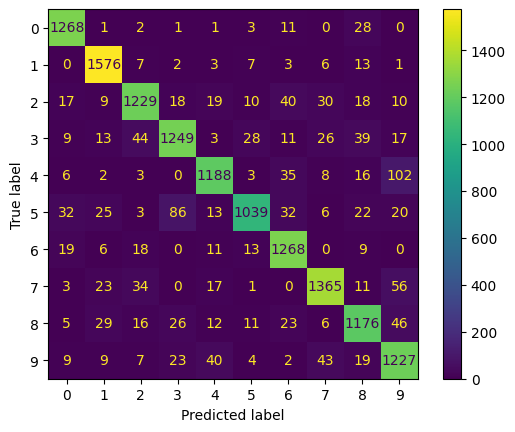

In [6]:
cm_display = ConfusionMatrixDisplay(cm).plot()

In [7]:
import numpy as np
TP = np.zeros(10)
TN = np.zeros(10)
FP = np.zeros(10)
FN = np.zeros(10)

In [8]:
for i in range(cm.shape[0]): #Recorremos las filas de la matriz de confusión
  TP[i]=cm[i,i]; 
  FN[i]=sum(cm[i,:])-cm[i,i];  #sum(cm[i,:]) suma los elementos de la fila i
  FP[i]=sum(cm[:,i])-cm[i,i];  #sum(cm[:,i]) suma los elementos de la columna i
  SumaTotal = sum(sum(cm[:]))   #sum(cm[:]) Almacena en un array 1D la suma de cada fila. sum(sum(cm[:])) suma todos los elementos de la matriz
  TN[i]=SumaTotal-TP[i]-FP[i]-FN[i]

In [9]:
TP, FN, FP, TN

(array([1268., 1576., 1229., 1249., 1188., 1039., 1268., 1365., 1176.,
        1227.]),
 array([ 47.,  42., 171., 190., 175., 239.,  76., 145., 174., 156.]),
 array([100., 117., 134., 156., 119.,  80., 157., 125., 175., 252.]),
 array([12585., 12265., 12466., 12405., 12518., 12642., 12499., 12365.,
        12475., 12365.]))

In [10]:
#Accuracy global
sum(TP)/SumaTotal

0.8989285714285714

In [11]:
#Precision de cada clase
TP/(FP+TP)

array([0.92690058, 0.93089191, 0.90168745, 0.88896797, 0.9089518 ,
       0.9285076 , 0.88982456, 0.91610738, 0.87046632, 0.8296146 ])

In [12]:
#Recall de cada clase
TP/(FN+TP)

array([0.96425856, 0.97404203, 0.87785714, 0.86796386, 0.87160675,
       0.81298905, 0.94345238, 0.90397351, 0.87111111, 0.88720174])

Vamos a repetirlo para un clasificador binario

In [13]:
y = (y >'4')

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [15]:
randomF_clf.fit(X_train, y_train)
y_pred_rf = randomF_clf.predict(X_test)

In [16]:
cm = confusion_matrix(y_test, y_pred_rf)
cm

array([[6406,  718],
       [ 434, 6442]])

In [17]:
from sklearn.metrics import accuracy_score, precision_score
accuracy_score(y_test, y_pred_rf), precision_score(y_test, y_pred_rf)

(0.9177142857142857, 0.8997206703910614)